In [125]:
import pandas as pd
import numpy as np

In [126]:
df = pd.read_csv("ExportedData/cleanCMURevenueAdjusted.tsv", sep="\t")

df["Languages"] = df["Languages"].apply(lambda x: eval(x))
df["Languages"] = df[df["Languages"].map(len) > 0]["Languages"]

df["Genres"] = df["Genres"].apply(lambda x: eval(x))
df["Genres"] = df[df["Genres"].map(len) > 0]["Genres"]

df["Countries"] = df["Countries"].apply(lambda x: eval(x))
df["Countries"] = df[df["Countries"].map(len) > 0]["Countries"]

df = df.dropna()
df.head()

,WikiID,Name,Revenue,ReleaseDate,Languages,Countries,Genres,Summary,Year,AdjustedRevenue
0,975900,Ghosts of Mars,14010832.0,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",2001.0,2.022468e+07
5,171005,Henry V,10161099.0,1989-11-08,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989.0,2.093678e+07
8,77856,Mary Poppins,102272727.0,1964-08-27,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",The film opens with Mary Poppins perched in a...,1964.0,8.429252e+08
12,156558,Baby Boy,29381649.0,2001-06-27,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",A young 20-year-old named Jody lives with his...,2001.0,4.241249e+07
22,261237,The Gods Must Be Crazy,34331783.0,1980,"[Afrikaans Language, English Language]",[South Africa],"[Adventure, Action/Adventure, Indie, World cin...",The film is a collision of three separate stor...,1980.0,1.066477e+08


In [127]:
len(df)

7295

In [128]:
englishes = set(['American English', 'English Language'])

englishOrNo = []

for language in df["Languages"]:
    counter = 0
    for lang in language:
        if lang in englishes:
            counter = 1
    englishOrNo.append(counter)

df["ForeignLanguage"] = englishOrNo
df.head()

,WikiID,Name,Revenue,ReleaseDate,Languages,Countries,Genres,Summary,Year,AdjustedRevenue,ForeignLanguage
0,975900,Ghosts of Mars,14010832.0,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",2001.0,2.022468e+07,1
5,171005,Henry V,10161099.0,1989-11-08,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989.0,2.093678e+07,1
8,77856,Mary Poppins,102272727.0,1964-08-27,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",The film opens with Mary Poppins perched in a...,1964.0,8.429252e+08,1
12,156558,Baby Boy,29381649.0,2001-06-27,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",A young 20-year-old named Jody lives with his...,2001.0,4.241249e+07,1
22,261237,The Gods Must Be Crazy,34331783.0,1980,"[Afrikaans Language, English Language]",[South Africa],"[Adventure, Action/Adventure, Indie, World cin...",The film is a collision of three separate stor...,1980.0,1.066477e+08,1


In [129]:
us = 'United States of America'
internationalFilms = []

for country in df["Countries"]:
    counter = 1
    for c in country:
        if c == us:
            counter = 0
    internationalFilms.append(counter)

df["International"] = internationalFilms
df.head()

,WikiID,Name,Revenue,ReleaseDate,Languages,Countries,Genres,Summary,Year,AdjustedRevenue,ForeignLanguage,International
0,975900,Ghosts of Mars,14010832.0,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",2001.0,2.022468e+07,1,0
5,171005,Henry V,10161099.0,1989-11-08,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989.0,2.093678e+07,1,1
8,77856,Mary Poppins,102272727.0,1964-08-27,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",The film opens with Mary Poppins perched in a...,1964.0,8.429252e+08,1,0
12,156558,Baby Boy,29381649.0,2001-06-27,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",A young 20-year-old named Jody lives with his...,2001.0,4.241249e+07,1,0
22,261237,The Gods Must Be Crazy,34331783.0,1980,"[Afrikaans Language, English Language]",[South Africa],"[Adventure, Action/Adventure, Indie, World cin...",The film is a collision of three separate stor...,1980.0,1.066477e+08,1,1


In [130]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [135]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

rawPlots = train["Summary"]

plotVectorizer = TfidfVectorizer(max_features=500, stop_words=stopwords.words('english'))
trainPlots = plotVectorizer.fit_transform(rawPlots).toarray()
testPlots = plotVectorizer.transform(test["Summary"]).toarray()

In [136]:
def testClassifier(trainX, trainY, testX, testY, classifier):
    classifier.fit(trainX, trainY)
    prediction = classifier.predict(testX)
    return sum(prediction == testY)/len(testY)

In [137]:
from sklearn.naive_bayes import GaussianNB

testClassifier(trainPlots, train["International"], testPlots, test["International"], GaussianNB())

0.6106922549691569

In [139]:
from sklearn.neighbors import KNeighborsClassifier

testClassifier(trainPlots, train["International"], testPlots, test["International"], KNeighborsClassifier())

0.8389307745030843

In [140]:
from sklearn.tree import DecisionTreeClassifier

testClassifier(trainPlots, train["International"], testPlots, test["International"], DecisionTreeClassifier())

0.7710760795065114

0.8594928032899246 accuracy for 100
0.8588074023303632 accuracy for 110
0.8594928032899246 accuracy for 120
0.8588074023303632 accuracy for 130
0.8574366004112406 accuracy for 140
0.8574366004112406 accuracy for 150
0.8574366004112406 accuracy for 160
0.8588074023303632 accuracy for 170
0.8588074023303632 accuracy for 180
0.8574366004112406 accuracy for 190


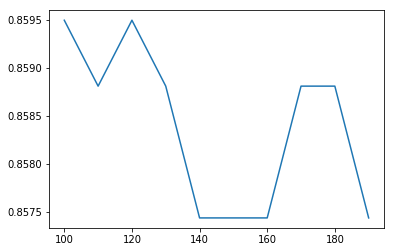

In [141]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

ns = np.arange(100,200, 10)
accuracies = []

for n in ns:
    accuracy = testClassifier(trainPlots, train["International"], testPlots, test["International"], RandomForestClassifier(n_estimators=n))
    print(f"{accuracy} accuracy for {n}")
    accuracies.append(accuracy)
plt.plot(ns, accuracies)

0.8594928032899246 accuracy for 10
0.858122001370802 accuracy for 20
0.8485263879369431 accuracy for 30
0.8444139821795751 accuracy for 40
0.8505825908156271 accuracy for 50
0.8464701850582591 accuracy for 60
0.8519533927347498 accuracy for 70
0.8560657984921178 accuracy for 80
0.8540095956134338 accuracy for 90


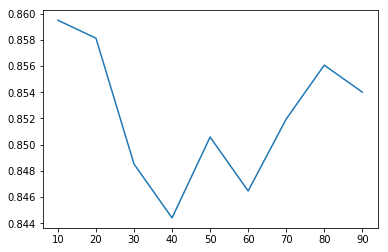

In [143]:
depths = np.arange(10,100, 10)
accuracies = []

for depth in depths:
    accuracy = testClassifier(trainPlots, train["International"], testPlots, test["International"], RandomForestClassifier(n_estimators=10, max_depth=depth))
    print(f"{accuracy} accuracy for {depth}")
    accuracies.append(accuracy)
plt.plot(depths, accuracies)

In [144]:
testClassifier(trainPlots, train["International"], testPlots, test["International"], RandomForestClassifier(n_estimators=120, max_depth=10))

0.8588074023303632

0.8553803975325566 for 10
0.8519533927347498 for 20
0.8567511994516792 for 30
0.8498971898560658 for 40
0.8457847840986977 for 50
0.8444139821795751 for 60
0.8464701850582591 for 70
0.8416723783413297 for 80
0.8382453735435229 for 90


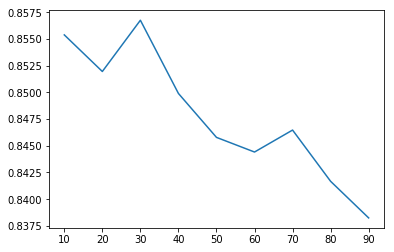

In [145]:
from sklearn.ensemble import AdaBoostClassifier

accuracies = []
ns = np.arange(10,100, 10)

for n in ns:
    accuracy = testClassifier(trainPlots, train["International"], testPlots, test["International"], AdaBoostClassifier(n_estimators=n))
    print(f"{accuracy} for {n}")
    accuracies.append(accuracy)
plt.plot(ns, accuracies)

In [123]:
countries = set()
counter = 0
for ls in df["Countries"]:
    value = 0
    for country in ls:
        if country == us:
            value = 1
    counter += value
counter/len(df)

0.84893762851268